In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

sns.set_style("whitegrid")

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

# Содержание 

Набор данных содержит сведения об использовании мобильных устройств и моделях поведения 1000 пользователей. Данные включают в себя различные демографические данные (возраст, пол, местоположение) и статистику использования приложений, например, общее количество часов, потраченных на приложения, ежедневное время, проведенное за экраном, и количество используемых приложений. 

**Цель данной работы** - провести исследование связи и влияния различных социальных и технических показателей  на 
пользование  смартфона. 

Актуальность данной работы состоит в анализе влияния совокупностей факторов на ежедневное использование мобильного телефона. В современном мире каждый иммет сотовое устройство,однако используется оно в разных целях.

Таким образом, задача заключается в построении модели, через работу с которой можно будет исходя из данных о сприложениях, а также о пользователе, выявить цели использования телефона.

`Daily Screen Time Hours` - это целевая переменная для прогнозирования. Она означает, сколько времени пользователь проводит в телефоне в течении дня.

#### Описании параметров:
- `User_ID` - пользователь смартфона
- `Age` - возраст пользователя
- `Gender`- пол пользователя
- `Total_App_Usage_Hours`- общее количество проведенного времени в мобильном устройстве в день
- **`Daily_Screen_Time_Hours`** - общее экранное время, включая все активности, в часах
- `Number_of_Apps_Used` - число различных приложений, использованных пользователем в течении дня
- `Social_Media_Usage_Hours` - часы, посвященные приложениям для социальных сетей
- `Productivity_App_Usage_Hours` - время, затрачиваемое на приложения, связанные с производительностью
- `Gaming_App_Usage_Hours` - часы, проведенные в приложениях для игр
- `Location` - город или регион, в котором проживает пользовательльзователь


Ссылка на датасет:
https://www.kaggle.com/datasets/bhadramohit/smartphone-usage-and-behavioral-dataset?resource=download 

### Размер датасета,основные признаки

In [5]:
df = pd.read_csv('mobile_usage_behavioral_analysis.csv')

In [6]:
df.head()

,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location
0,1,56,Male,2.61,7.15,24,4.43,0.55,2.40,Los Angeles
1,2,46,Male,2.13,13.79,18,4.67,4.42,2.43,Chicago
2,3,32,Female,7.28,4.50,11,4.58,1.71,2.83,Houston
3,4,25,Female,1.20,6.29,21,3.18,3.42,4.58,Phoenix
4,5,38,Male,6.31,12.59,14,3.15,0.13,4.00,New York


In [7]:
df.sample(5)

,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location
342,343,56,Male,4.99,8.34,24,1.82,2.92,0.61,Chicago
290,291,55,Female,8.39,3.74,27,4.37,2.23,2.56,Phoenix
565,566,34,Male,5.14,2.18,19,3.65,0.63,2.76,New York
2,3,32,Female,7.28,4.50,11,4.58,1.71,2.83,Houston
194,195,49,Female,2.00,12.79,13,3.84,2.42,2.76,Houston


### Размер датасета

In [9]:
df.shape

(1000, 10)

1000 - наблюдений,
10- признаков

Пропуски

In [12]:
df.isna().sum()

User_ID                         0
Age                             0
Gender                          0
Total_App_Usage_Hours           0
Daily_Screen_Time_Hours         0
Number_of_Apps_Used             0
Social_Media_Usage_Hours        0
Productivity_App_Usage_Hours    0
Gaming_App_Usage_Hours          0
Location                        0
dtype: int64

Можно заметить полное отсуствие пропущенных значений, что говорит об очень хорошем качестве представленных данных.

### Проверяем данные на дубли

In [15]:
print(f"Total_Screen_Time_Hours has {df.duplicated().sum()} duplicated data")

Total_Screen_Time_Hours has 0 duplicated data


Смотрим информацию о датасете

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User_ID                       1000 non-null   int64  
 1   Age                           1000 non-null   int64  
 2   Gender                        1000 non-null   object 
 3   Total_App_Usage_Hours         1000 non-null   float64
 4   Daily_Screen_Time_Hours       1000 non-null   float64
 5   Number_of_Apps_Used           1000 non-null   int64  
 6   Social_Media_Usage_Hours      1000 non-null   float64
 7   Productivity_App_Usage_Hours  1000 non-null   float64
 8   Gaming_App_Usage_Hours        1000 non-null   float64
 9   Location                      1000 non-null   object 
dtypes: float64(5), int64(3), object(2)
memory usage: 78.3+ KB


У нас 10 переменных по 1000 записей. Типы переменных:

**Numerical:** 8 columns (User_ID, Age, Total_App_Usage_Hours, Daily_Screen_Time_Hours, Number_of_Apps_Used, Social_Media_Usage_Hours, Productivity_App_Usage_Hours,Gaming_App_Usage_Hours).

**Categorical:** 2 columns (Gender, Location)

### Основные статистики

In [20]:
df.describe()

,User_ID,Age,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,38.745000,6.405670,7.696310,16.64700,2.456330,2.495270,2.475410
std,288.819436,12.186734,3.134855,3.714187,7.61961,1.439525,1.443392,1.450362
min,1.000000,18.000000,1.000000,1.010000,3.00000,0.000000,0.000000,0.010000
25%,250.750000,28.000000,3.590000,4.530000,10.00000,1.200000,1.282500,1.220000
50%,500.500000,40.000000,6.455000,7.880000,17.00000,2.445000,2.435000,2.455000
75%,750.250000,50.000000,9.122500,10.910000,23.00000,3.672500,3.710000,3.782500
max,1000.000000,59.000000,11.970000,14.000000,29.00000,4.990000,5.000000,5.000000


Можем наблюдать, что чем старше возраст, тем больше используются мобильное средство.

In [22]:
df.describe(include='object')

,Gender,Location
count,1000,1000
unique,2,5
top,Male,New York
freq,517,243


## Exploratory Data Analysis

### Целевая переменная

Согласно задаче целевая переменная дожна показывать ежедневное количество часов использования телефона, то есть за целевую переменную приняли `Daily_Screen_Time_Hours`: 
- `1 = high usage` (использование больше (>=) 4 часов в день), 
- `0 = low usage` (использование меньше (<) 4 часов). 

### Рассмотрим на примере выборки из датасета:

In [26]:
threshold = 4

In [27]:
#использование меньше (<) 4 часов
df.Daily_Screen_Time_Hours[df.Daily_Screen_Time_Hours < threshold].count()/len(df)*100

21.7

In [28]:
#использование больше (>=) 4 часов в день
df.Daily_Screen_Time_Hours[df.Daily_Screen_Time_Hours >= threshold].count()/len(df)*100

78.3

In [29]:
data = {'Daily_Screen_Time_Hours': df['Daily_Screen_Time_Hours'].sample(n=50, random_state=42)}
df_target = pd.DataFrame(data)

In [30]:
df_target['High_Usage'] = (df_target['Daily_Screen_Time_Hours'] >= threshold).astype(int)

In [31]:
df_target['High_Usage'].value_counts()

High_Usage
1    36
0    14
Name: count, dtype: int64

Распределение 0 и 1 в датасете неравномерное одинаково (21.7% и 78.3% соответственно)

Из выбранной совокупности (50 пользователей) 14 пользователей используют телефон меньше 4 часов, остальные — больше 8 часов.

**Задача ML** - задача `бинарной классификации`.
Задача модели - спрогнозировать, будет ли пользователь активно использовать телефон в данный день(> 4 часов).

Сгруппируем наши типы переменных и создадим две функции для визуализации наших числовых и категориальных данных.

In [34]:
df.drop(columns=["User_ID"])

,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location
0,56,Male,2.61,7.15,24,4.43,0.55,2.40,Los Angeles
1,46,Male,2.13,13.79,18,4.67,4.42,2.43,Chicago
2,32,Female,7.28,4.50,11,4.58,1.71,2.83,Houston
3,25,Female,1.20,6.29,21,3.18,3.42,4.58,Phoenix
4,38,Male,6.31,12.59,14,3.15,0.13,4.00,New York
...,...,...,...,...,...,...,...,...,...
995,41,Female,3.58,12.46,13,4.12,2.44,1.33,Los Angeles
996,32,Male,9.65,10.51,11,1.02,1.02,3.84,Los Angeles
997,46,Female,11.68,10.06,9,2.35,3.13,1.03,Phoenix
998,25,Male,3.89,10.78,15,4.00,1.79,1.61,Phoenix


In [35]:
num_var = ["Age", "Total_App_Usage_Hours", "Number_of_Apps_Used", "Social_Media_Usage_Hours", "Productivity_App_Usage_Hours","Gaming_App_Usage_Hours"]
cat_var = ["Gender", "Location"]
target = "Daily_Screen_Time_Hours"

In [36]:
df.head()

,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location
0,1,56,Male,2.61,7.15,24,4.43,0.55,2.40,Los Angeles
1,2,46,Male,2.13,13.79,18,4.67,4.42,2.43,Chicago
2,3,32,Female,7.28,4.50,11,4.58,1.71,2.83,Houston
3,4,25,Female,1.20,6.29,21,3.18,3.42,4.58,Phoenix
4,5,38,Male,6.31,12.59,14,3.15,0.13,4.00,New York


In [37]:
def num_dist(data, var):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(data=data, x=var, kde=True, ax=ax[0])
    sns.boxplot(data=data, x=var, ax=ax[1])
    ax[0].set_title(f"{var} Distribution Histogram")
    ax[1].set_title(f"{var} Distribution Boxplot")

    plt.show()
    
def cat_dist(data, var):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    df[var].value_counts().plot(kind="pie", explode=[0.05 for x in data[var].dropna().unique()], autopct='%1.1f%%', ax=ax[0], shadow=True)
    ax[0].set_title(f"{var} Pie Chart")
    ax[0].set_ylabel('')

    count = sns.countplot(x=var, data=df, ax=ax[1])
    for bar in count.patches:
        count.annotate(format(bar.get_height()),
            (bar.get_x() + bar.get_width() / 2,
            bar.get_height()), ha='center', va='center',
            size=11, xytext=(0, 8),
            textcoords='offset points')
    ax[1].set_title(f"{var} Bar Chart")
    plt.show()

Распределение целевой переменной

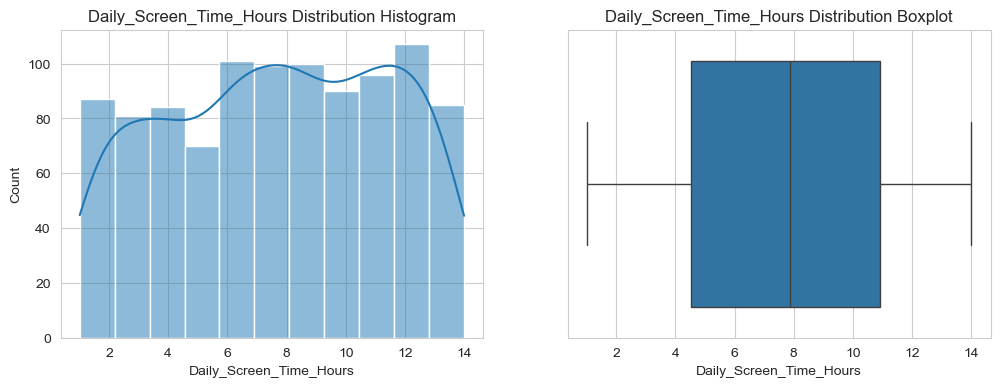

In [39]:
num_dist(df, target)

In [40]:
df['Daily_Screen_Time_Hours_bool'] = (df['Daily_Screen_Time_Hours'] >= threshold).astype(int)

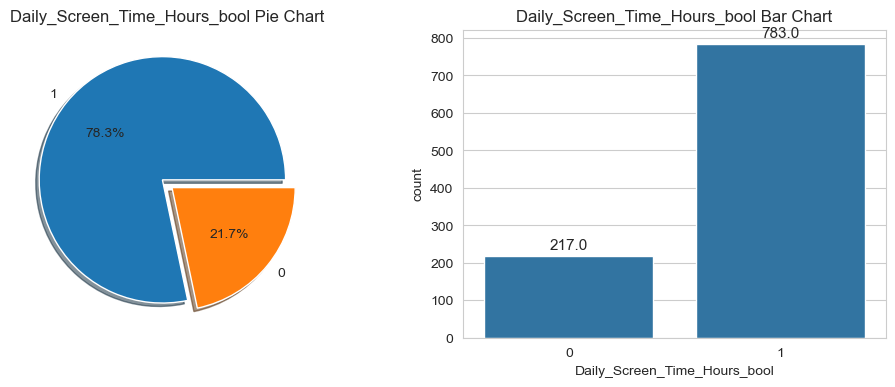

In [41]:
cat_dist(df, 'Daily_Screen_Time_Hours_bool')

Выводы: Большинство пользователей использует более 4 часов, что является активным показателем. 

### Релевантные графики

#### График таргетной переменной

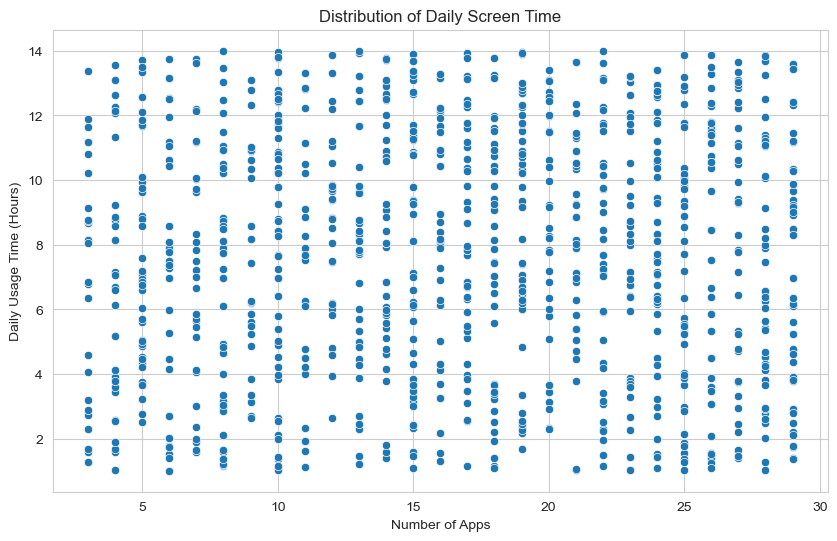

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Number_of_Apps_Used', y='Daily_Screen_Time_Hours', data=df)
plt.title('Distribution of Daily Screen Time')
plt.xlabel('Number of Apps')
plt.ylabel('Daily Usage Time (Hours)')
plt.show()

Согласно распределению наблюдаем слабую зависимость между количеством приложений в телефоне пользователя от ежедневного использования смартфона. Однако небольшое увеличение все таки есть.

#### Матрица корреляций

In [48]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,User_ID,Age,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Daily_Screen_Time_Hours_bool
User_ID,1.000000,-0.028576,-0.010570,0.020941,-0.001214,-0.002608,0.002207,-0.003514,0.024233
Age,-0.028576,1.000000,-0.003319,-0.017639,-0.002081,-0.008324,0.005848,-0.012969,-0.022174
Total_App_Usage_Hours,-0.010570,-0.003319,1.000000,0.002948,0.041493,0.019330,-0.009983,-0.067770,0.011893
Daily_Screen_Time_Hours,0.020941,-0.017639,0.002948,1.000000,0.016835,0.031773,0.033206,-0.012984,0.738855
Number_of_Apps_Used,-0.001214,-0.002081,0.041493,0.016835,1.000000,0.017789,-0.007814,0.019468,-0.020260
Social_Media_Usage_Hours,-0.002608,-0.008324,0.019330,0.031773,0.017789,1.000000,-0.076456,0.006217,0.009415
Productivity_App_Usage_Hours,0.002207,0.005848,-0.009983,0.033206,-0.007814,-0.076456,1.000000,0.027217,0.031553
Gaming_App_Usage_Hours,-0.003514,-0.012969,-0.067770,-0.012984,0.019468,0.006217,0.027217,1.000000,0.003370
Daily_Screen_Time_Hours_bool,0.024233,-0.022174,0.011893,0.738855,-0.020260,0.009415,0.031553,0.003370,1.000000


<Axes: >

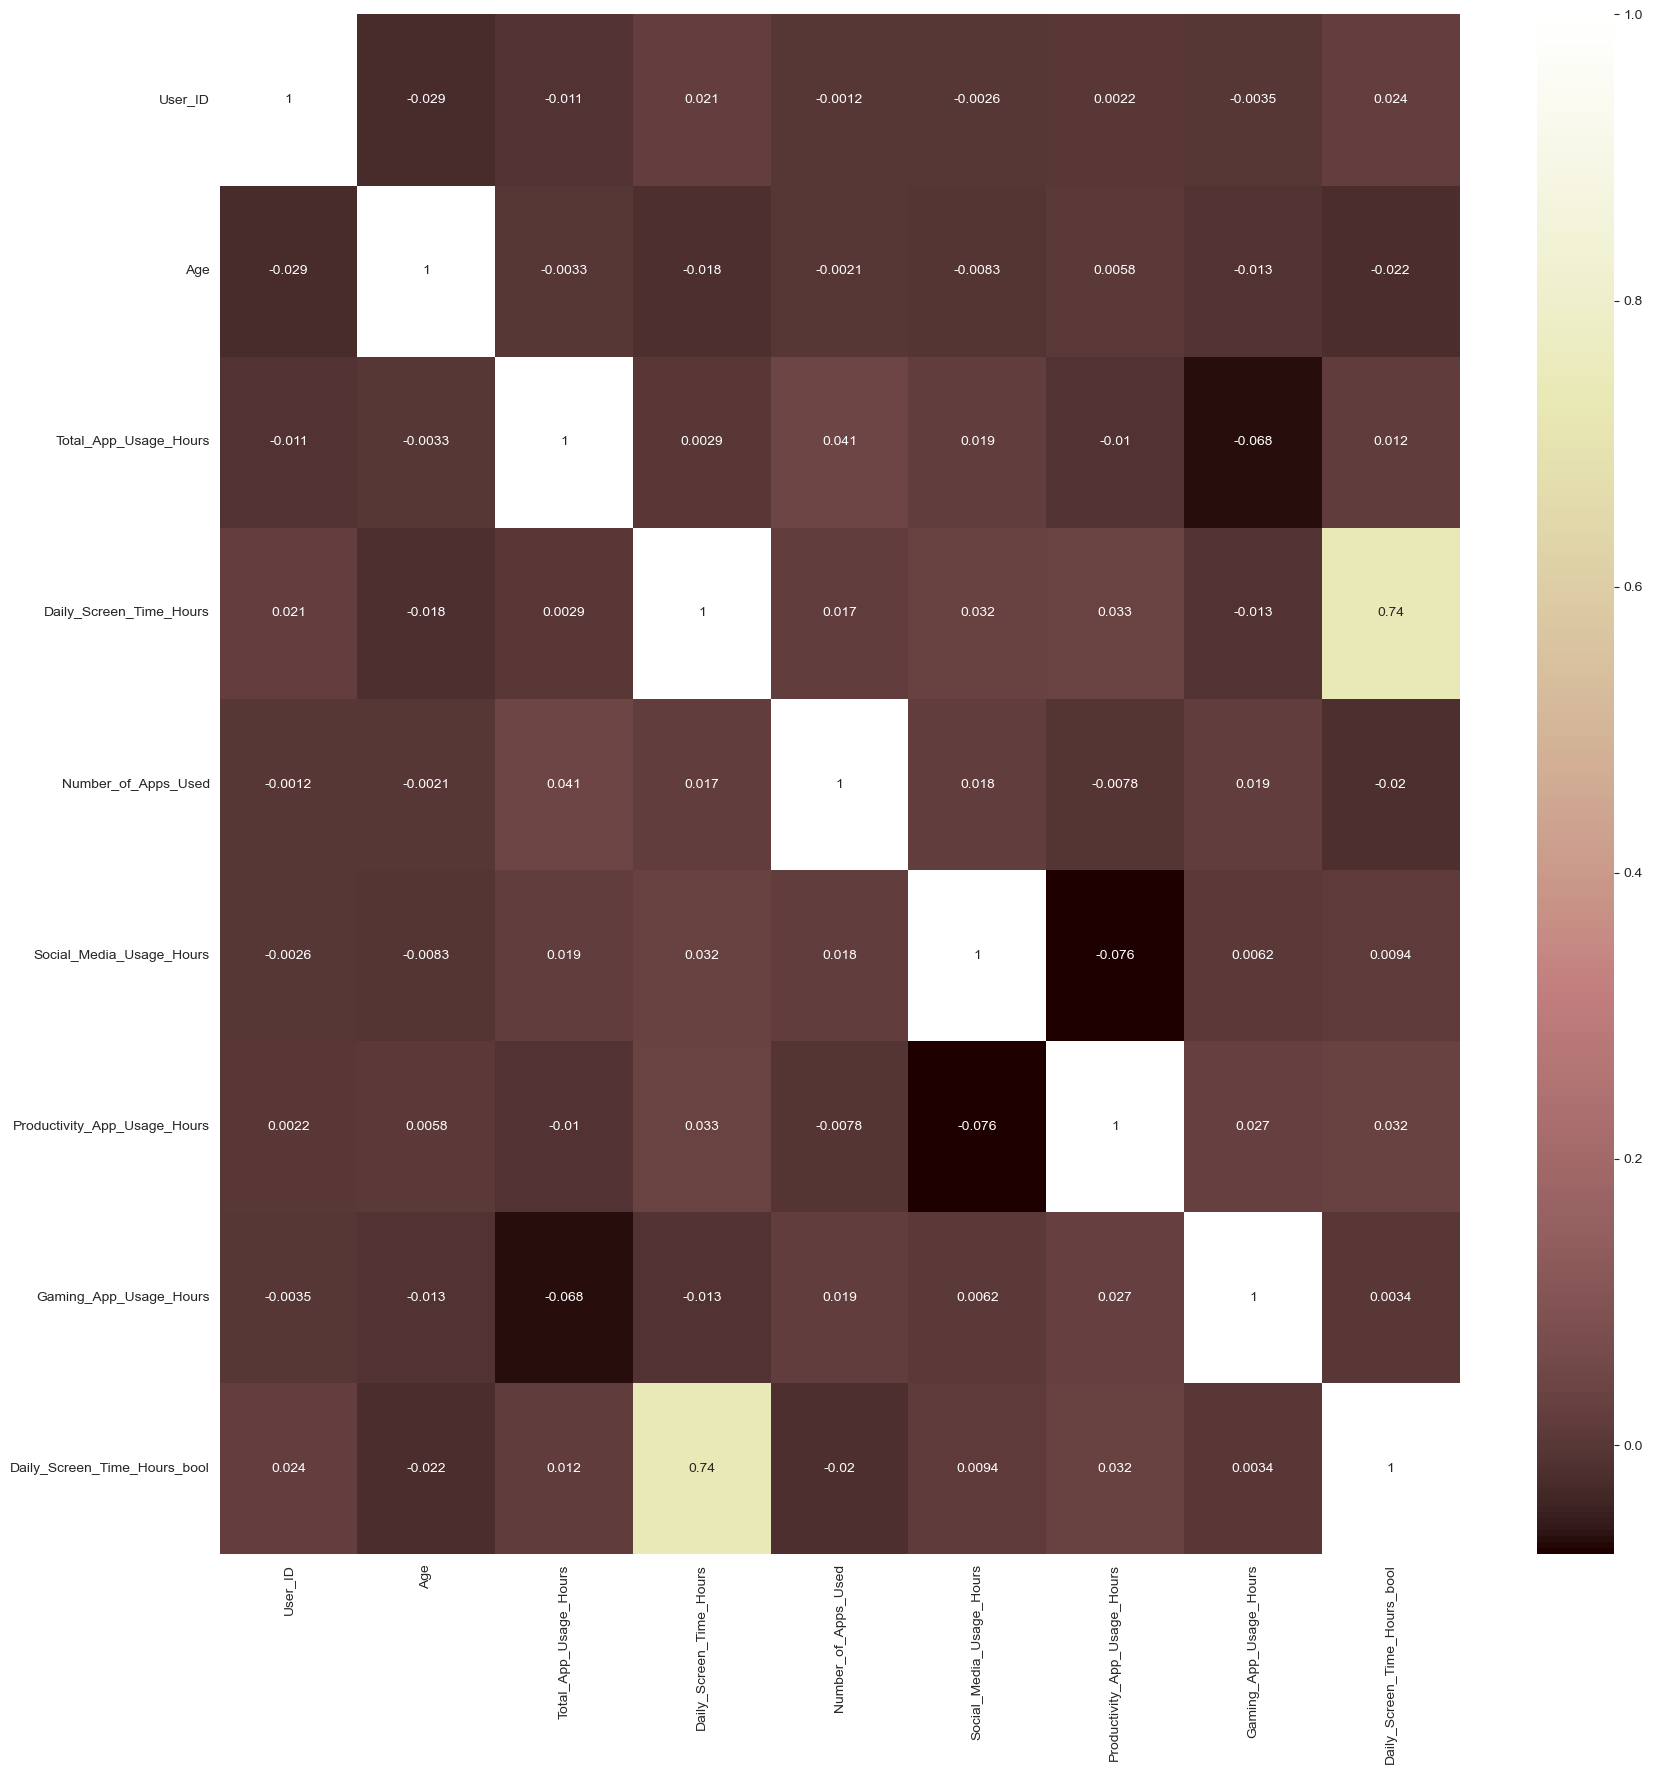

In [49]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap='pink')

In [50]:
threshold = 0.5
correlation_pairs = (
    corr_matrix.where((corr_matrix > threshold) & (corr_matrix < 1))
    .stack()
    .reset_index()
)
correlation_pairs.columns = ['Var1', 'Var2', 'Correlation']
correlation_pairs

,Var1,Var2,Correlation
0,Daily_Screen_Time_Hours,Daily_Screen_Time_Hours_bool,0.738855
1,Daily_Screen_Time_Hours_bool,Daily_Screen_Time_Hours,0.738855


Вывод: нет сильной корреляции между переменными.

### Срезы данных

In [53]:
df.sample()

,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location,Daily_Screen_Time_Hours_bool
216,217,36,Male,5.89,8.32,29,3.16,2.25,1.76,Los Angeles,1


In [54]:
df.sample(5)

,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location,Daily_Screen_Time_Hours_bool
543,544,28,Male,11.74,11.20,29,0.48,1.21,3.83,New York,1
812,813,56,Female,5.97,6.01,13,2.53,2.24,3.31,Chicago,1
715,716,55,Female,1.63,13.50,26,1.35,3.58,2.91,Phoenix,1
275,276,50,Female,1.03,8.14,13,2.83,1.13,4.18,Phoenix,1
52,53,57,Male,5.77,12.22,16,2.09,4.55,3.42,Phoenix,1


In [55]:
df.head()

,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location,Daily_Screen_Time_Hours_bool
0,1,56,Male,2.61,7.15,24,4.43,0.55,2.40,Los Angeles,1
1,2,46,Male,2.13,13.79,18,4.67,4.42,2.43,Chicago,1
2,3,32,Female,7.28,4.50,11,4.58,1.71,2.83,Houston,1
3,4,25,Female,1.20,6.29,21,3.18,3.42,4.58,Phoenix,1
4,5,38,Male,6.31,12.59,14,3.15,0.13,4.00,New York,1


In [56]:
df.tail()

,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location,Daily_Screen_Time_Hours_bool
995,996,41,Female,3.58,12.46,13,4.12,2.44,1.33,Los Angeles,1
996,997,32,Male,9.65,10.51,11,1.02,1.02,3.84,Los Angeles,1
997,998,46,Female,11.68,10.06,9,2.35,3.13,1.03,Phoenix,1
998,999,25,Male,3.89,10.78,15,4.00,1.79,1.61,Phoenix,1
999,1000,22,Female,3.99,7.05,4,0.90,4.98,2.33,Phoenix,1


In [57]:
df

,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location,Daily_Screen_Time_Hours_bool
0,1,56,Male,2.61,7.15,24,4.43,0.55,2.40,Los Angeles,1
1,2,46,Male,2.13,13.79,18,4.67,4.42,2.43,Chicago,1
2,3,32,Female,7.28,4.50,11,4.58,1.71,2.83,Houston,1
3,4,25,Female,1.20,6.29,21,3.18,3.42,4.58,Phoenix,1
4,5,38,Male,6.31,12.59,14,3.15,0.13,4.00,New York,1
...,...,...,...,...,...,...,...,...,...,...,...
995,996,41,Female,3.58,12.46,13,4.12,2.44,1.33,Los Angeles,1
996,997,32,Male,9.65,10.51,11,1.02,1.02,3.84,Los Angeles,1
997,998,46,Female,11.68,10.06,9,2.35,3.13,1.03,Phoenix,1
998,999,25,Male,3.89,10.78,15,4.00,1.79,1.61,Phoenix,1


In [58]:
df_slice = df.iloc[:1000][['Daily_Screen_Time_Hours', 'Social_Media_Usage_Hours']] 
df_slice

,Daily_Screen_Time_Hours,Social_Media_Usage_Hours
0,7.15,4.43
1,13.79,4.67
2,4.50,4.58
3,6.29,3.18
4,12.59,3.15
...,...,...
995,12.46,4.12
996,10.51,1.02
997,10.06,2.35
998,10.78,4.00


Данный анализ показывает, что в современном мире, когда социальные сети заполонили просторы и время пользователей мобильных телефоно, использование социальных сетей занимает практически половину времени всего пользования гаджета.

Выводы

Выбранный датасет не имеет пропусков, что говорит о хорошем прогнозировании. Кроме того, отсутствуют дубли. Каждый из показателей датасета влияет на целевую переменную в той или иной степени. Согласно корреляционной матрице социальные сети и игровые приложения занимают большую часть досуга пользователя в телефонном пространстве. Зависимости от пола или местоположения пользователя явно выявлены не были. 

# Feature Engineering

## Пропуски

Создадим пропуски искусственно в числовых и категориальных признаках

In [65]:
indices_to_remove = df.sample(frac=0.1, random_state=42).index
columns = ["Total_App_Usage_Hours", "Gender"]
df.loc[indices_to_remove, columns] = np.nan

In [66]:
pd.DataFrame([
    (df.isna().sum())[(df.isna().sum())>0],
    (df.isna().sum()/len(df))[(100*df.isna().sum()/len(df))>0]
], index = ["Кол-во", "%"]).T.style.background_gradient("viridis")

,Кол-во,%
Gender,100.000000,0.100000
Total_App_Usage_Hours,100.000000,0.100000


### Заполнение пропусков в числовом признаке

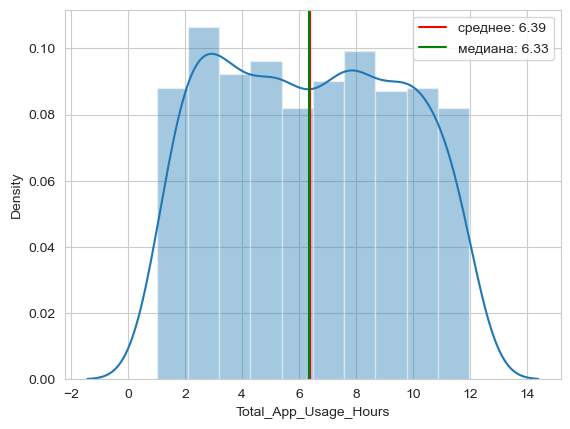

In [68]:
mean = df.Total_App_Usage_Hours.mean()
median = df.Total_App_Usage_Hours.median()
sns.distplot(df.Total_App_Usage_Hours)
plt.axvline(mean, color = "r", label = f'среднее: {mean:.2f}')
plt.axvline(median, color = "g", label = f'медиана: {median:.2f}')
plt.legend()

<Axes: ylabel='Total_App_Usage_Hours'>

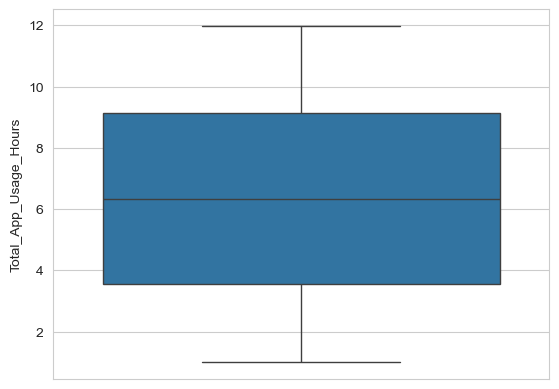

In [69]:
sns.boxplot(df.Total_App_Usage_Hours)

Для этого числового признака не характерны выбросы, поэтому заполним пропущенные значения средним

In [71]:
imputer = SimpleImputer(strategy='mean')
df['Total_App_Usage_Hours'] = imputer.fit_transform(df[['Total_App_Usage_Hours']])

In [72]:
df.Total_App_Usage_Hours.isnull().sum()

0

### Заполнение пропусков в категориальном признаке

<Axes: ylabel='count'>

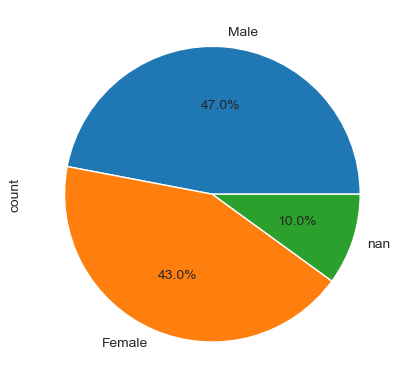

In [74]:
df['Gender'].value_counts(dropna=False).plot(kind='pie', autopct='%1.1f%%')

In [75]:
df['Gender'].describe()

count      900
unique       2
top       Male
freq       470
Name: Gender, dtype: object

Заменим пропуски с помощью `KNNImputer` (метод k-ближайших соседей)

In [77]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [78]:
knn_imputer = KNNImputer(n_neighbors=5, weights="uniform")
df['Gender'] = knn_imputer.fit_transform(df[['Gender']])
df['Gender'] = df['Gender'].round()

In [79]:
df.Gender.isnull().sum()

0

## Обработка выбросов

Построим боксплоты для всех числовых переменных датасета, чтобы изучить их на выбросы

In [82]:
df[num_var]

,Age,Total_App_Usage_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours
0,56,2.610000,24,4.43,0.55,2.40
1,46,2.130000,18,4.67,4.42,2.43
2,32,7.280000,11,4.58,1.71,2.83
3,25,1.200000,21,3.18,3.42,4.58
4,38,6.310000,14,3.15,0.13,4.00
...,...,...,...,...,...,...
995,41,3.580000,13,4.12,2.44,1.33
996,32,9.650000,11,1.02,1.02,3.84
997,46,11.680000,9,2.35,3.13,1.03
998,25,6.389978,15,4.00,1.79,1.61


In [83]:
def box_plots(df, columns):
    for col in columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Боксплот для {col}')
        plt.xlabel(col)
        plt.show()

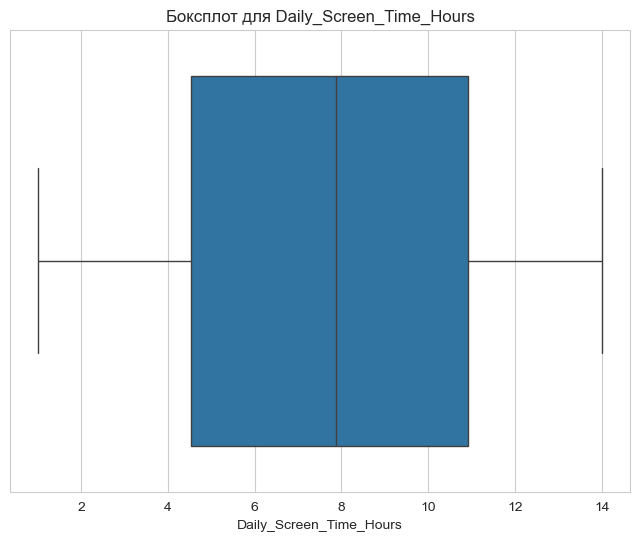

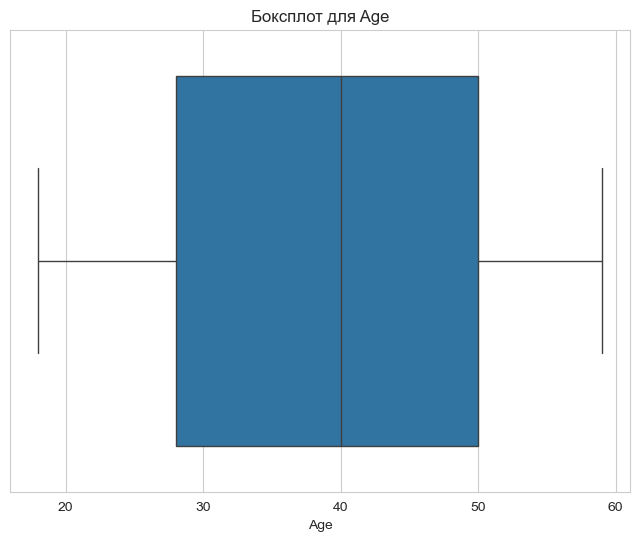

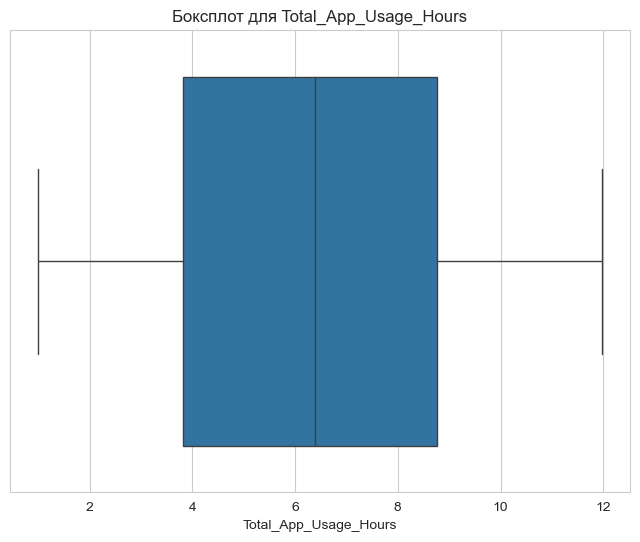

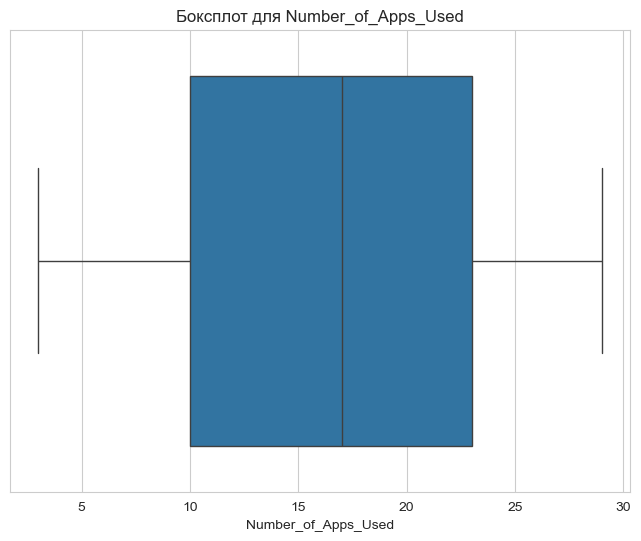

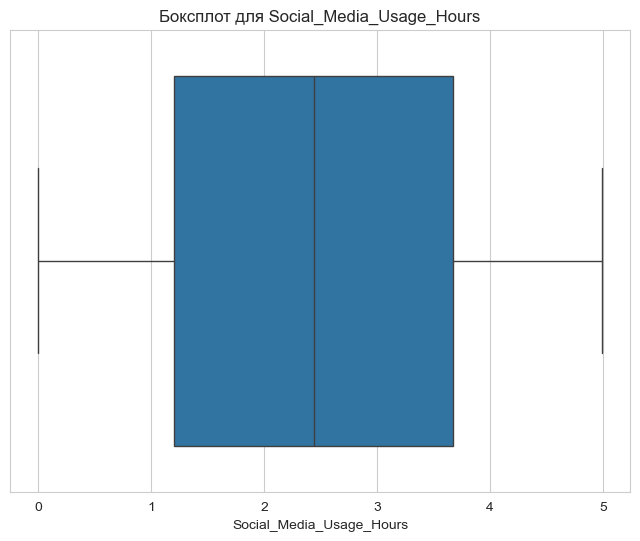

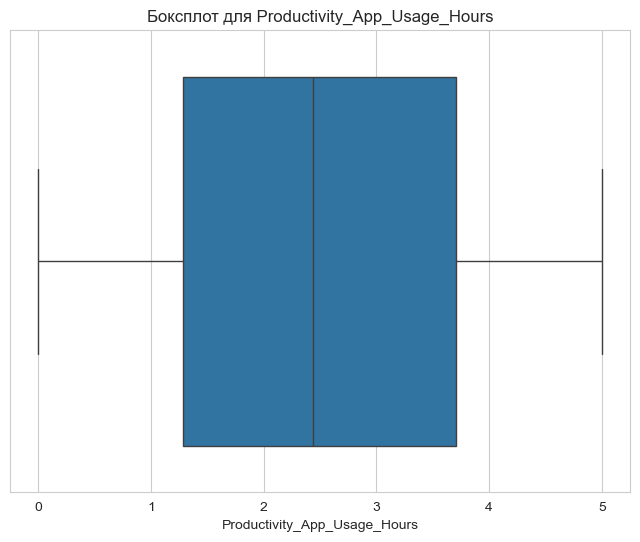

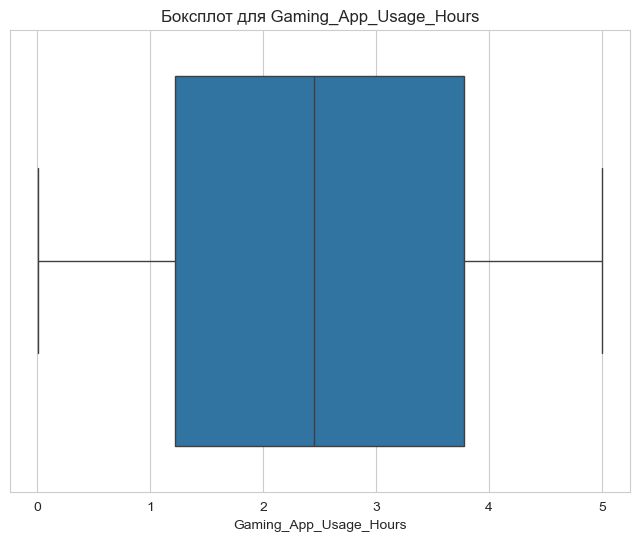

In [84]:
box_plots(df, [target]+num_var)

**Вывод**: Выбросов нет

## Кодировка категориальных данных

In [87]:
df[cat_var]

,Gender,Location
0,1.0,Los Angeles
1,1.0,Chicago
2,0.0,Houston
3,0.0,Phoenix
4,1.0,New York
...,...,...
995,0.0,Los Angeles
996,1.0,Los Angeles
997,0.0,Phoenix
998,1.0,Phoenix


У нас всего 1 категориальная переменная — `Location` (Gender на прошлом шаге мы привели к типу bool)

`Location` — номинальные данные

In [89]:
df.Location.unique()

array(['Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'New York'],
      dtype=object)

Это набор данных с **невысокой кардинальностью** — 5 уникальных значений

Закодируем с помощью `BinaryEncoder`
- Преобразует категориальные значения в бинарный формат. Этот метод полезен для работы с большим количеством уникальных значений, так как снижает размерность данных по сравнению с `One-Hot Encoding`.
- Каждый уникальный `Location` преобразуется в бинарный код, где каждая колонка соответствует одному биту.

In [91]:
enc = ce.BinaryEncoder(cols=['Location'])
df = enc.fit_transform(df)
df

,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location_0,Location_1,Location_2,Daily_Screen_Time_Hours_bool
0,1,56,1.0,2.610000,7.15,24,4.43,0.55,2.40,0,0,1,1
1,2,46,1.0,2.130000,13.79,18,4.67,4.42,2.43,0,1,0,1
2,3,32,0.0,7.280000,4.50,11,4.58,1.71,2.83,0,1,1,1
3,4,25,0.0,1.200000,6.29,21,3.18,3.42,4.58,1,0,0,1
4,5,38,1.0,6.310000,12.59,14,3.15,0.13,4.00,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,41,0.0,3.580000,12.46,13,4.12,2.44,1.33,0,0,1,1
996,997,32,1.0,9.650000,10.51,11,1.02,1.02,3.84,0,0,1,1
997,998,46,0.0,11.680000,10.06,9,2.35,3.13,1.03,1,0,0,1
998,999,25,1.0,6.389978,10.78,15,4.00,1.79,1.61,1,0,0,1


## Выбранная метрика  — `F1-мера`

In [93]:
df.Daily_Screen_Time_Hours = df.Daily_Screen_Time_Hours_bool
df.drop(columns = "Daily_Screen_Time_Hours_bool", inplace = True)

In [94]:
df.Daily_Screen_Time_Hours.value_counts(normalize = True)

Daily_Screen_Time_Hours
1    0.783
0    0.217
Name: proportion, dtype: float64

Будем использовать **`F1-метрику`** для оценки модели в вашем датасете, поскольку классы распределены неравномерно (21.7% и 78.3%), и стандартная `Accuracy` может быть обманчиво высокой за счет доминирования большинства класса. **`F1-метрика`** как `Precision`, так и `Recall`, что особенно важно для сбалансированной оценки качества предсказаний, поскольку она помогает учесть как точность нахождения меньшинства, так и полноту обнаружения всех примеров редкого класса